In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r"C:\Users\kiran\Downloads\Project\input.csv")

In [3]:
data.columns

Index(['Inv Sl no', 'unit_cost1', 'unit_cost2', 'unit_cost3', 'unit_cost4',
       'ITEM1', 'ITEM2', 'ITEM3', 'ITEM4', 'margin1', 'margin2', 'margin3',
       'margin4', 'Margin', 'Billed Amount'],
      dtype='object')

In [4]:
data.head()

,Inv Sl no,unit_cost1,unit_cost2,unit_cost3,unit_cost4,ITEM1,ITEM2,ITEM3,ITEM4,margin1,margin2,margin3,margin4,Margin,Billed Amount
0,1,0,5,0,15,0,2,0,1,2,2.5,4,6,11.0,25
1,2,0,5,0,0,0,1,0,0,2,2.5,4,6,2.5,5
2,3,0,5,0,0,0,3,0,0,2,2.5,4,6,7.5,15
3,4,0,5,0,15,0,1,0,3,2,2.5,4,6,20.5,50
4,5,0,5,0,15,0,3,0,3,2,2.5,4,6,25.5,60


In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [6]:
# Select the features you want to use for clustering
X = data[['Billed Amount']]

# Define the number of clusters (K)
num_clusters = 3

# Initialize the KMeans model and fit it to the data
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

print(data['Billed Amount'].max())
print(data['Billed Amount'].min())
print(data['Billed Amount'].mean())
data[['Cluster','Billed Amount']]

390
5
37.26323370543752


,Cluster,Billed Amount
0,0,25
1,0,5
2,0,15
3,2,50
4,2,60
...,...,...
2772,0,12
2773,0,27
2774,1,117
2775,2,84


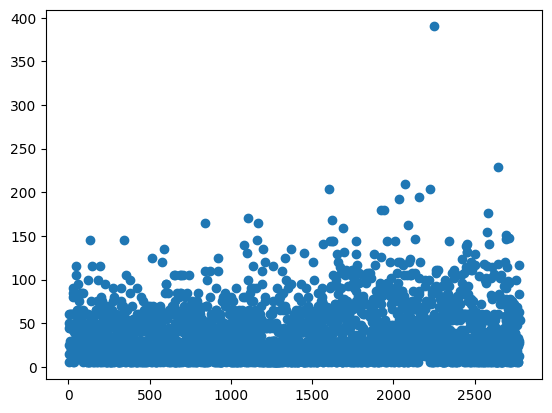

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data["Inv Sl no"],data["Billed Amount"])

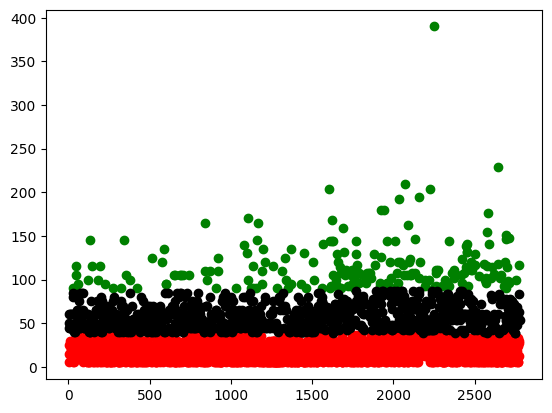

In [8]:
df1=data[data['Cluster']==0]
df2=data[data['Cluster']==1]
df3=data[data['Cluster']==2]
plt.scatter(df1["Inv Sl no"],df1["Billed Amount"],color="Red")
plt.scatter(df2["Inv Sl no"],df2["Billed Amount"],color="Green")
plt.scatter(df3["Inv Sl no"],df3["Billed Amount"],color="black")

In [11]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[['Billed Amount']])
    sse.append(km.inertia_)

In [12]:
sse

[2775168.5761613273,
 1005322.5107110029,
 498467.3643395678,
 336562.66064502083,
 232858.8297499707,
 169680.86010579194,
 123283.60758459201,
 93360.32361549055,
 71691.19147922055]

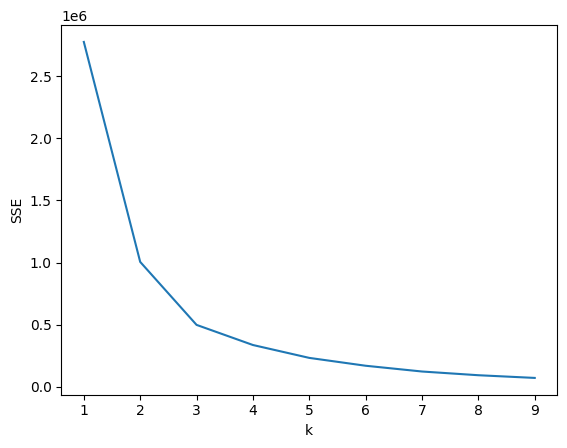

In [13]:
plt.xlabel("k")
plt.ylabel('SSE')
plt.plot(k_range,sse)

In [14]:
# Fit the model to the data
kmeans.fit(data[['Billed Amount']])

# Get the final centroids
final_centroids = kmeans.cluster_centers_[:, 0]

print("Final centroids:", final_centroids)

Final centroids: [ 17.70967742 117.23        57.15481651]


In [15]:
up_selling=data[data['Cluster']==1]

In [16]:
up_selling.reset_index(drop=True,inplace=True)

In [17]:
up_selling

,Inv Sl no,unit_cost1,unit_cost2,unit_cost3,unit_cost4,ITEM1,ITEM2,ITEM3,ITEM4,margin1,margin2,margin3,margin4,Margin,Billed Amount,Cluster
0,30,5,5,10,15,1,2,3,3,2,2.5,4,6,37.0,90,1
1,44,10,10,10,30,6,3,3,2,2,2.5,4,6,43.5,105,1
2,47,5,10,0,30,1,4,0,6,2,2.5,4,6,48.0,115,1
3,59,10,5,10,30,4,1,1,4,2,2.5,4,6,38.5,95,1
4,120,10,15,10,30,2,5,2,3,2,2.5,4,6,42.5,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2704,6,12,15,20,1,7,2,1,2,2.5,4,6,33.5,98,1
196,2709,6,6,15,0,3,3,4,0,2,2.5,4,6,29.5,96,1
197,2715,6,6,15,20,1,2,2,5,2,2.5,4,6,45.0,148,1
198,2754,6,6,15,0,1,3,5,0,2,2.5,4,6,29.5,99,1


In [18]:
C_selling=data[data['Cluster']==2]
C_selling.reset_index(drop=True,inplace=True)

In [19]:
C_selling.describe()

,Inv Sl no,unit_cost1,unit_cost2,unit_cost3,unit_cost4,ITEM1,ITEM2,ITEM3,ITEM4,margin1,margin2,margin3,margin4,Margin,Billed Amount,Cluster
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.0,872.0,872.0,872.0,872.000000,872.000000,872.0
mean,1355.049312,4.380734,2.657110,6.846330,10.258028,1.809633,1.097477,1.241972,1.616972,2.0,2.5,4.0,6.0,21.032683,57.154817,2.0
std,804.840961,3.105049,2.916849,7.081404,7.713062,1.528301,1.406363,1.446300,1.344320,0.0,0.0,0.0,0.0,5.299234,13.048708,0.0
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,2.5,4.0,6.0,2.500000,39.000000,2.0
25%,654.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,2.5,4.0,6.0,18.000000,45.000000,2.0
50%,1389.000000,5.000000,0.000000,10.000000,15.000000,2.000000,0.000000,1.000000,2.000000,2.0,2.5,4.0,6.0,20.000000,55.000000,2.0
75%,2072.500000,6.000000,5.000000,15.000000,15.000000,3.000000,2.000000,2.000000,3.000000,2.0,2.5,4.0,6.0,24.000000,65.000000,2.0
max,2777.000000,15.000000,12.000000,30.000000,30.000000,7.000000,6.000000,5.000000,5.000000,2.0,2.5,4.0,6.0,37.000000,87.000000,2.0


In [20]:
up_selling.describe()

,Inv Sl no,unit_cost1,unit_cost2,unit_cost3,unit_cost4,ITEM1,ITEM2,ITEM3,ITEM4,margin1,margin2,margin3,margin4,Margin,Billed Amount,Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.0,200.0,200.0,200.000000,200.000000,200.0
mean,1734.785000,8.110000,5.755000,15.900000,16.450000,3.265000,2.515000,3.165000,2.645000,2.0,2.5,4.0,6.0,41.347500,117.230000,1.0
std,720.475066,4.037251,3.753052,8.561923,10.521455,2.060584,1.896777,1.834284,1.904497,0.0,0.0,0.0,0.0,11.643382,32.191748,0.0
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,2.5,4.0,6.0,26.000000,90.000000,1.0
25%,1275.750000,6.000000,5.000000,10.000000,15.000000,2.000000,1.000000,2.000000,1.000000,2.0,2.5,4.0,6.0,34.000000,98.750000,1.0
50%,1846.500000,6.000000,6.000000,15.000000,15.000000,3.000000,2.000000,3.000000,3.000000,2.0,2.5,4.0,6.0,39.250000,108.000000,1.0
75%,2322.000000,12.000000,6.000000,16.250000,20.000000,5.000000,4.000000,4.000000,4.000000,2.0,2.5,4.0,6.0,45.500000,125.000000,1.0
max,2775.000000,24.000000,15.000000,60.000000,60.000000,9.000000,8.000000,11.000000,11.000000,2.0,2.5,4.0,6.0,131.000000,390.000000,1.0


In [21]:
up_selling['Billed Amount'].mean()

117.23

In [22]:
twice_std_upselling=up_selling['Billed Amount'].std()*2
mean_upselling=up_selling['Billed Amount'].mean()
total=twice_std_upselling + mean_upselling
print(f'mean {mean_upselling} + twice_std {twice_std_upselling} = {total}')

mean 117.23 + twice_std 64.38349612178823 = 181.61349612178822


In [23]:
twice_std_cselling=C_selling['Billed Amount'].std()*2
mean_cselling=C_selling['Billed Amount'].mean()
total=twice_std_cselling + mean_cselling
print(f'mean {mean_cselling} + twice_std {twice_std_cselling} = {total}')

mean 57.15481651376147 + twice_std 26.097415294519408 = 83.25223180828087


In [24]:
C_selling

,Inv Sl no,unit_cost1,unit_cost2,unit_cost3,unit_cost4,ITEM1,ITEM2,ITEM3,ITEM4,margin1,margin2,margin3,margin4,Margin,Billed Amount,Cluster
0,4,0,5,0,15,0,1,0,3,2,2.5,4,6,20.5,50,2
1,5,0,5,0,15,0,3,0,3,2,2.5,4,6,25.5,60,2
2,6,0,0,0,15,0,0,0,3,2,2.5,4,6,18.0,45,2
3,10,5,0,0,15,3,0,0,3,2,2.5,4,6,24.0,60,2
4,11,0,0,0,15,0,0,0,3,2,2.5,4,6,18.0,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,2761,6,6,0,0,4,4,0,0,2,2.5,4,6,18.0,48,2
868,2765,6,12,15,0,2,5,1,0,2,2.5,4,6,20.5,57,2
869,2771,6,0,15,0,3,0,3,0,2,2.5,4,6,18.0,63,2
870,2776,0,6,15,0,0,4,4,0,2,2.5,4,6,26.0,84,2


In [25]:
C_selling["ITEM3_124"] = np.where(
    (C_selling['ITEM3'] >= 1) & 
    (C_selling['ITEM1'] == 0) &
    (C_selling['ITEM2'] == 0) &
    (C_selling['ITEM4'] == 0),
    1,  # Value to assign if conditions are met
    0  # Value to assign if conditions are not met
)

In [26]:
C_selling

,Inv Sl no,unit_cost1,unit_cost2,unit_cost3,unit_cost4,ITEM1,ITEM2,ITEM3,ITEM4,margin1,margin2,margin3,margin4,Margin,Billed Amount,Cluster,ITEM3_124
0,4,0,5,0,15,0,1,0,3,2,2.5,4,6,20.5,50,2,0
1,5,0,5,0,15,0,3,0,3,2,2.5,4,6,25.5,60,2,0
2,6,0,0,0,15,0,0,0,3,2,2.5,4,6,18.0,45,2,0
3,10,5,0,0,15,3,0,0,3,2,2.5,4,6,24.0,60,2,0
4,11,0,0,0,15,0,0,0,3,2,2.5,4,6,18.0,45,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,2761,6,6,0,0,4,4,0,0,2,2.5,4,6,18.0,48,2,0
868,2765,6,12,15,0,2,5,1,0,2,2.5,4,6,20.5,57,2,0
869,2771,6,0,15,0,3,0,3,0,2,2.5,4,6,18.0,63,2,0
870,2776,0,6,15,0,0,4,4,0,2,2.5,4,6,26.0,84,2,0


In [27]:
C_selling.columns

Index(['Inv Sl no', 'unit_cost1', 'unit_cost2', 'unit_cost3', 'unit_cost4',
       'ITEM1', 'ITEM2', 'ITEM3', 'ITEM4', 'margin1', 'margin2', 'margin3',
       'margin4', 'Margin', 'Billed Amount', 'Cluster', 'ITEM3_124'],
      dtype='object')

# item 3 when item 1,item 2 and item4 is absent present

In [28]:
itm3_124=C_selling[['Inv Sl no', 'unit_cost1', 'unit_cost2',
       'unit_cost3', 'unit_cost4', 'ITEM1',
       'ITEM2', 'ITEM3', 'ITEM4', 'margin1', 'margin2', 'margin3', 'margin4', 'Margin',
       'Billed Amount','ITEM3_124']]

In [29]:
itm3_124.head()

,Inv Sl no,unit_cost1,unit_cost2,unit_cost3,unit_cost4,ITEM1,ITEM2,ITEM3,ITEM4,margin1,margin2,margin3,margin4,Margin,Billed Amount,ITEM3_124
0,4,0,5,0,15,0,1,0,3,2,2.5,4,6,20.5,50,0
1,5,0,5,0,15,0,3,0,3,2,2.5,4,6,25.5,60,0
2,6,0,0,0,15,0,0,0,3,2,2.5,4,6,18.0,45,0
3,10,5,0,0,15,3,0,0,3,2,2.5,4,6,24.0,60,0
4,11,0,0,0,15,0,0,0,3,2,2.5,4,6,18.0,45,0


# Discount of 1 to 11 Rs 

In [30]:
# Define the custom functions outside the loop
def calculate_new_delta_profit(row, i):
    if row['ITEM3_124'] == 1:
        return row['Margin'] * row['ITEM3'] + (row['Margin'] - i)
    else:
        return 0

def calculate_new_bill(row, i):
    if row['ITEM3_124'] == 1:
        return row['Billed Amount'] + row['unit_cost1'] * (row['ITEM3'] - i) * row['ITEM3']
    else:
        return row['Billed Amount']

def calculate_new_profit(row, i):
    if row['ITEM3_124'] == 0:
        return row['Margin']
    else:
        if row[f'New Bill_{i}'] <= 83:
            return row[f'New Delta Profit_{i}']
        else:
            return row['Margin']

# Initialize an empty dictionary to store the results
Discount_= {'Discount': [], 'Profit': []}
# Apply the custom functions in the loop
for i in range(0, 11):
    itm3_124[f'New Delta Profit_{i}'] = itm3_124.apply(lambda row: calculate_new_delta_profit(row, i), axis=1)
    itm3_124[f'New Bill_{i}'] = itm3_124.apply(lambda row: calculate_new_bill(row, i), axis=1)
    itm3_124[f'New Profit with in 83 Rs bill_{i}'] = itm3_124.apply(lambda row: calculate_new_profit(row, i), axis=1)
    total_profit = itm3_124[f'New Profit with in 83 Rs bill_{i}'].sum()
    
    Discount_['Discount'].append(i)
    Discount_['Profit'].append(total_profit)
# Convert the dictionary into a DataFrame
final_results_df1 = pd.DataFrame(Discount_)

# Display the final results DataFrame
print(final_results_df1)



    Discount   Profit
0          0  20236.5
1          1  20202.5
2          2  20168.5
3          3  20134.5
4          4  20100.5
5          5  20066.5
6          6  20032.5
7          7  19998.5
8          8  19964.5
9          9  19930.5
10        10  19896.5


# Loss in Profit combo 3 with 1 or 2

In [31]:
C_selling["ITEM3_12"] = np.where(
    (C_selling['ITEM3'] >= 1) & 
    ((C_selling['ITEM1'] >= 1) |
    (C_selling['ITEM2'] >= 1)),
   
    1,  # Value to assign if conditions are met
    0  # Value to assign if conditions are not met
)
(C_selling["ITEM3_12"]).sum() 

389

In [32]:
import pandas as pd
import numpy as np

# Assuming c_selling is your DataFrame
result_dataframes = {}  # Dictionary to store result DataFrames

for i in range(0, 11):
    new_column_name = [f"Loss In Profit Combo_{i}"]  # Create a new column name for each i
    
    new_column_name = np.where(
        C_selling["ITEM3_12"] == 1,
        np.minimum(C_selling["ITEM3"], C_selling["ITEM1"] + C_selling["ITEM2"]) * i,
        0
    )
    
    # Calculate and store the sum for the current column in the result dictionary
    column_sum = new_column_name.sum()
    result_dataframes[i] = pd.DataFrame({f"Loss for Discount_{i}": [column_sum]})

# Convert the dictionary of DataFrames into a single DataFrame
result_df = pd.concat(result_dataframes.values(), axis=1)

# Reset the index to have a proper DataFrame structure
result_df = result_df.reset_index(drop=True)

# Use pd.melt() to transform the DataFrame
ITEM3_loss = pd.melt(result_df, value_vars=result_df.columns, var_name="Loss in Combo Item 3 with 1 or 2", value_name="Value")

# Print the melted DataFrame
print(ITEM3_loss)


   Loss in Combo Item 3 with 1 or 2  Value
0               Loss for Discount_0      0
1               Loss for Discount_1    722
2               Loss for Discount_2   1444
3               Loss for Discount_3   2166
4               Loss for Discount_4   2888
5               Loss for Discount_5   3610
6               Loss for Discount_6   4332
7               Loss for Discount_7   5054
8               Loss for Discount_8   5776
9               Loss for Discount_9   6498
10             Loss for Discount_10   7220


In [33]:
final_results_df1['NET_Profit']=final_results_df1['Profit']-ITEM3_loss['Value']
final_results_df1

,Discount,Profit,NET_Profit
0,0,20236.5,20236.5
1,1,20202.5,19480.5
2,2,20168.5,18724.5
3,3,20134.5,17968.5
4,4,20100.5,17212.5
5,5,20066.5,16456.5
6,6,20032.5,15700.5
7,7,19998.5,14944.5
8,8,19964.5,14188.5
9,9,19930.5,13432.5


In [34]:
C_selling["ITEM4_123"] = np.where(
    (C_selling['ITEM4'] >= 1) & 
    (C_selling['ITEM1'] == 0) &
    (C_selling['ITEM2'] == 0) &
    (C_selling['ITEM3'] == 0),
    1,  # Value to assign if conditions are met
    0  # Value to assign if conditions are not met
)

# Only Item4 Discount from 0 to10

In [35]:
ITEM4_123=C_selling[['Inv Sl no','unit_cost1', 'unit_cost2',
       'unit_cost3', 'unit_cost4','ITEM1',
       'ITEM2', 'ITEM3', 'ITEM4','margin1', 'margin2', 'margin3', 'margin4', 'Margin',
       'Billed Amount','ITEM4_123']]

In [36]:
# Define the custom functions outside the loop
def calculate_new_delta_profit(row, i):
    if row['ITEM4_123'] == 1:
        return row['Margin'] * row['ITEM4'] + (row['Margin'] - i)
    else:
        return 0

def calculate_new_bill(row, i):
    if row['ITEM4_123'] == 1:
        return row['Billed Amount'] + row['unit_cost1'] * (row['ITEM4'] - i) * row['ITEM4']
    else:
        return row['Billed Amount']

def calculate_new_profit(row, i):
    if row['ITEM4_123'] == 0:
        return row['Margin']
    else:
        if row[f'New Bill_{i}'] <= 83:
            return row[f'New Delta Profit_{i}']
        else:
            return row['Margin']
discount={'Discount':[],'Profit':[]}
# Apply the custom functions in the loop
for i in range(0, 11):
    ITEM4_123[f'New Delta Profit_{i}'] = ITEM4_123.apply(lambda row: calculate_new_delta_profit(row, i), axis=1)
    ITEM4_123[f'New Bill_{i}'] = ITEM4_123.apply(lambda row: calculate_new_bill(row, i), axis=1)
    ITEM4_123[f'New Profit with in 83 Rs bill_{i}'] =ITEM4_123.apply(lambda row: calculate_new_profit(row, i), axis=1)
    total_profit=ITEM4_123[f'New Profit with in 83 Rs bill_{i}'].sum()
    discount['Discount'].append(i)
    discount['Profit'].append(total_profit)
final_results_df2 = pd.DataFrame(discount)

# Display the final results DataFrame
print(final_results_df2)



    Discount   Profit
0          0  23476.5
1          1  23389.5
2          2  23302.5
3          3  23215.5
4          4  23128.5
5          5  23041.5
6          6  22954.5
7          7  22867.5
8          8  22780.5
9          9  22693.5
10        10  22606.5


# Loss in item 4 with 1 or 2

In [37]:
C_selling["ITEM4_12"] = np.where(
    (C_selling['ITEM4'] >= 1) & 
    ((C_selling['ITEM1'] >= 1) |
    (C_selling['ITEM2'] >= 1)),
   
    1,  # Value to assign if conditions are met
    0  # Value to assign if conditions are not met
)
(C_selling["ITEM4_12"]).sum() 

466

In [38]:
import pandas as pd
import numpy as np

# Assuming c_selling is your DataFrame
result_dataframes = {}  # Dictionary to store result DataFrames

for i in range(0, 11):
    new_column_name = [f"Loss In Profit Combo_{i}"]  # Create a new column name for each i
    
    new_column_name = np.where(
        C_selling["ITEM4_12"] == 1,
        np.minimum(C_selling["ITEM4"], C_selling["ITEM1"] + C_selling["ITEM2"]) * i,
        0
    )
    
    # Calculate and store the sum for the current column in the result dictionary
    column_sum = new_column_name.sum()
    result_dataframes[i] = pd.DataFrame({f"Loss for Discount_{i}": [column_sum]})

# Convert the dictionary of DataFrames into a single DataFrame
result_df = pd.concat(result_dataframes.values(), axis=1)

# Reset the index to have a proper DataFrame structure
result_df = result_df.reset_index(drop=True)

# Use pd.melt() to transform the DataFrame
ITEM4_loss = pd.melt(result_df, value_vars=result_df.columns, var_name="Loss in Combo Item 3 with 1 or 2", value_name="Value")

# Print the melted DataFrame
print(ITEM4_loss)


   Loss in Combo Item 3 with 1 or 2  Value
0               Loss for Discount_0      0
1               Loss for Discount_1    909
2               Loss for Discount_2   1818
3               Loss for Discount_3   2727
4               Loss for Discount_4   3636
5               Loss for Discount_5   4545
6               Loss for Discount_6   5454
7               Loss for Discount_7   6363
8               Loss for Discount_8   7272
9               Loss for Discount_9   8181
10             Loss for Discount_10   9090


In [41]:
final_results_df2['NET_Profit']=final_results_df2['Profit']-ITEM4_loss['Value']
final_results_df2

,Discount,Profit,NET_Profit
0,0,23476.5,23476.5
1,1,23389.5,22480.5
2,2,23302.5,21484.5
3,3,23215.5,20488.5
4,4,23128.5,19492.5
5,5,23041.5,18496.5
6,6,22954.5,17500.5
7,7,22867.5,16504.5
8,8,22780.5,15508.5
9,9,22693.5,14512.5


Coefficient (Slope): -87.00000000000003
Intercept: 23476.5


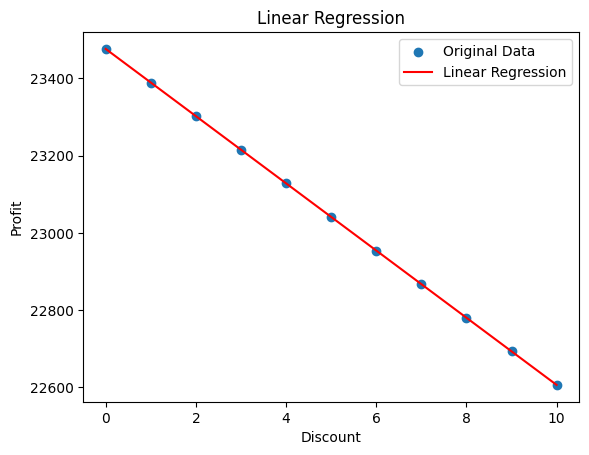

R-squared: 1.0


In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Separating the features (X) and target (y)
X = final_results_df2['Discount'].values.reshape(-1, 1)
y = final_results_df2['Profit'].values

# Creating a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Getting predictions from the model
predictions = model.predict(X)

# Printing the model's coefficients
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

# Plotting the original data and the linear regression line
plt.scatter(X, y, label='Original Data')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Linear Regression')
plt.legend()
plt.show()
from sklearn.metrics import r2_score

# Calculating R-squared
r2 = r2_score(y, predictions)
print("R-squared:", r2)


# COMBO ITEM(1 or 2) and 3 

In [42]:
C_selling["ITEM12n3"] = np.where(
    ((C_selling['ITEM1'] >= 1) |
    (C_selling['ITEM2']>=1))&
    (C_selling['ITEM3'] >= 1)&
    (C_selling['ITEM4'] == 0),
    1,  # Value to assign if conditions are met
    0 ) # Value to assign if conditions are not met
    
(C_selling["ITEM12n3"]).sum() 

246

# Discount on ITEM1n3

In [43]:
ITEM12n3_4=C_selling[['Inv Sl no', 'unit_cost1', 'unit_cost2',
       'unit_cost3', 'unit_cost4', 'ITEM1',
       'ITEM2', 'ITEM3', 'ITEM4', 'margin1', 'margin2', 'margin3', 'margin4', 'Margin',
       'Billed Amount','ITEM12n3']]

In [44]:
# Define the custom functions outside the loop
def calculate_new_delta_profit(row, i):
    if row['ITEM12n3'] == 1:
        return row['Margin'] * row['ITEM3'] + (row['Margin'] - i)
    else:
        return 0

def calculate_new_bill(row, i):
    if row['ITEM12n3'] == 1:
        return row['Billed Amount'] + row['unit_cost1'] * (row['ITEM3'] - i) * row['ITEM3']
    else:
        return row['Billed Amount']

def calculate_new_profit(row, i):
    if row['ITEM12n3'] == 0:
        return row['Margin']
    else:
        if row[f'New Bill_{i}'] <= 83:
            return row[f'New Delta Profit_{i}']
        else:
            return row['Margin']
discount={'Discount':[],'Profit':[]}
# Apply the custom functions in the loop
for i in range(0, 20):
    ITEM12n3_4[f'New Delta Profit_{i}'] = ITEM12n3_4.apply(lambda row: calculate_new_delta_profit(row, i), axis=1)
    ITEM12n3_4[f'New Bill_{i}'] = ITEM12n3_4.apply(lambda row: calculate_new_bill(row, i), axis=1)
    ITEM12n3_4[f'New Profit with in 83 Rs bill_{i}'] =ITEM12n3_4.apply(lambda row: calculate_new_profit(row, i), axis=1)
    total_profit=ITEM12n3_4[f'New Profit with in 83 Rs bill_{i}'].sum()
    discount['Discount'].append(i)
    discount['Profit'].append(total_profit)
final_results_df3 = pd.DataFrame(discount)

# Display the final results DataFrame
print(final_results_df3)



    Discount   Profit
0          0  21577.5
1          1  23625.5
2          2  25577.0
3          3  25764.0
4          4  27577.5
5          5  28258.5
6          6  28707.5
7          7  28466.5
8          8  28225.5
9          9  27984.5
10        10  27743.5
11        11  27502.5
12        12  27261.5
13        13  27020.5
14        14  26779.5
15        15  26538.5
16        16  26297.5
17        17  26056.5
18        18  25815.5
19        19  25574.5


# Loss due to Item 1 or 2 

In [45]:
import pandas as pd
import numpy as np

# Assuming c_selling is your DataFrame
result_dataframes = {}  # Dictionary to store result DataFrames

for i in range(0, 20):
    new_column_name = [f"Loss In Profit Combo_{i}"]  # Create a new column name for each i
    
    new_column_name = np.where(
        C_selling["ITEM12n3"] == 1,
        np.minimum(C_selling["ITEM3"], C_selling["ITEM1"] + C_selling["ITEM2"]) * i,
        0
    )
    
    # Calculate and store the sum for the current column in the result dictionary
    column_sum = new_column_name.sum()
    result_dataframes[i] = pd.DataFrame({f"Loss for Discount_{i}": [column_sum]})

# Convert the dictionary of DataFrames into a single DataFrame
result_df = pd.concat(result_dataframes.values(), axis=1)

# Reset the index to have a proper DataFrame structure
result_df = result_df.reset_index(drop=True)

# Use pd.melt() to transform the DataFrame
ITEM12n3_4loss = pd.melt(result_df, value_vars=result_df.columns, var_name="Loss in Combo Item12n3 not 4", value_name="Value")

# Print the melted DataFrame
print(ITEM12n3_4loss)


   Loss in Combo Item12n3 not 4  Value
0           Loss for Discount_0      0
1           Loss for Discount_1    500
2           Loss for Discount_2   1000
3           Loss for Discount_3   1500
4           Loss for Discount_4   2000
5           Loss for Discount_5   2500
6           Loss for Discount_6   3000
7           Loss for Discount_7   3500
8           Loss for Discount_8   4000
9           Loss for Discount_9   4500
10         Loss for Discount_10   5000
11         Loss for Discount_11   5500
12         Loss for Discount_12   6000
13         Loss for Discount_13   6500
14         Loss for Discount_14   7000
15         Loss for Discount_15   7500
16         Loss for Discount_16   8000
17         Loss for Discount_17   8500
18         Loss for Discount_18   9000
19         Loss for Discount_19   9500


In [47]:
final_results_df3['NET_Profit']=final_results_df3['Profit']-ITEM12n3_4loss['Value']
final_results_df3

,Discount,Profit,NET_Profit
0,0,21577.5,21577.5
1,1,23625.5,23125.5
2,2,25577.0,24577.0
3,3,25764.0,24264.0
4,4,27577.5,25577.5
5,5,28258.5,25758.5
6,6,28707.5,25707.5
7,7,28466.5,24966.5
8,8,28225.5,24225.5
9,9,27984.5,23484.5


In [ ]:
final_results_df3.to_csv(r"C:\Users\kiran\Downloads\Project\df3.csv")

Coefficient (Slope): 61.892481203007485
Intercept: 26029.72142857143


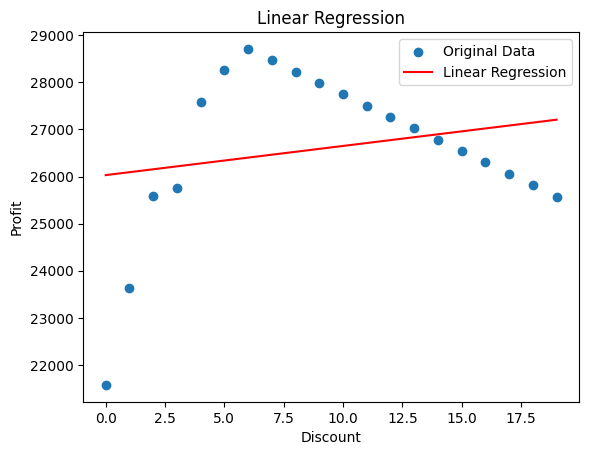

R-squared: 0.04482541487485525


In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Separating the features (X) and target (y)
X = final_results_df3['Discount'].values.reshape(-1, 1)
y = final_results_df3['Profit'].values

# Creating a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Getting predictions from the model
predictions = model.predict(X)

# Printing the model's coefficients
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

# Plotting the original data and the linear regression line
plt.scatter(X, y, label='Original Data')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Linear Regression')
plt.legend()
plt.show()
from sklearn.metrics import r2_score

# Calculating R-squared
r2 = r2_score(y, predictions)
print("R-squared:", r2)


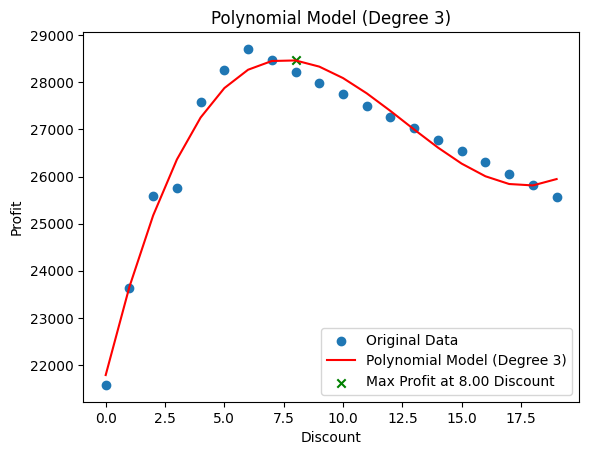

Maximum Profit: 28462.95879858914
Discount at Max Profit: 8


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Separating the features (X) and target (y)
X = final_results_df3['Discount'].values
y = final_results_df3['Profit'].values

# Fitting the polynomial model
degree = 3  # Degree of the polynomial
coefficients = np.polyfit(X, y, degree)
polynomial_predictions = np.polyval(coefficients, X)

# Finding the maximum profit and corresponding discount
max_profit_index = np.argmax(polynomial_predictions)
max_profit = polynomial_predictions[max_profit_index]
max_discount = X[max_profit_index]

# Plotting the original data and the polynomial model curve
plt.scatter(X, y, label='Original Data')
plt.plot(X, polynomial_predictions, color='red', label=f'Polynomial Model (Degree {degree})')
plt.scatter(max_discount, max_profit, color='green', label=f'Max Profit at {max_discount:.2f} Discount', marker='x')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title(f'Polynomial Model (Degree {degree})')
plt.legend()
plt.show()

print("Maximum Profit:", max_profit)
print("Discount at Max Profit:", max_discount)


# Item 1 or 2 with 4 

In [55]:
C_selling["ITEM12n4"] = np.where(
    ((C_selling['ITEM1'] >= 1) |
    (C_selling['ITEM2']>=1))&
    (C_selling['ITEM4'] >= 1)&
    (C_selling['ITEM3'] == 0),
    1,  # Value to assign if conditions are met
    0 ) # Value to assign if conditions are not met
    
(C_selling["ITEM12n4"]).sum() 

323

In [57]:
Item12n4=C_selling[['Inv Sl no', 'unit_cost1', 'unit_cost2',
       'unit_cost3', 'unit_cost4', 'ITEM1',
       'ITEM2', 'ITEM3', 'ITEM4', 'margin1', 'margin2', 'margin3', 'margin4', 'Margin',
       'Billed Amount','ITEM12n3','ITEM12n4']]

# Discount for 1 or 2 with Item4

In [58]:
# Define the custom functions outside the loop
def calculate_new_delta_profit(row, i):
    if row['ITEM12n4'] == 1:
        return row['Margin'] * row['ITEM4'] + (row['Margin'] - i)
    else:
        return 0

def calculate_new_bill(row, i):
    if row['ITEM12n4'] == 1:
        return row['Billed Amount'] + row['unit_cost1'] * (row['ITEM4'] - i) * row['ITEM4']
    else:
        return row['Billed Amount']

def calculate_new_profit(row, i):
    if row['ITEM12n4'] == 0:
        return row['Margin']
    else:
        if row[f'New Bill_{i}'] <= 83:
            return row[f'New Delta Profit_{i}']
        else:
            return row['Margin']
discount={'Discount':[],'Profit':[]}
# Apply the custom functions in the loop
for i in range(0, 20):
    Item12n4[f'New Delta Profit_{i}'] = Item12n4.apply(lambda row: calculate_new_delta_profit(row, i), axis=1)
    Item12n4[f'New Bill_{i}'] =Item12n4.apply(lambda row: calculate_new_bill(row, i), axis=1)
    Item12n4[f'New Profit with in 83 Rs bill_{i}'] =Item12n4.apply(lambda row: calculate_new_profit(row, i), axis=1)
    total_profit=Item12n4[f'New Profit with in 83 Rs bill_{i}'].sum()
    discount['Discount'].append(i)
    discount['Profit'].append(total_profit)
final_results_df4 = pd.DataFrame(discount)

# Display the final results DataFrame
print(final_results_df4)



    Discount   Profit
0          0  24371.0
1          1  26729.5
2          2  32497.0
3          3  34728.5
4          4  35487.0
5          5  35597.0
6          6  35439.0
7          7  35116.0
8          8  34793.0
9          9  34470.0
10        10  34147.0
11        11  33824.0
12        12  33501.0
13        13  33178.0
14        14  32855.0
15        15  32532.0
16        16  32209.0
17        17  31886.0
18        18  31563.0
19        19  31240.0


# Loss with 1 or 2

In [60]:
import pandas as pd
import numpy as np

# Assuming c_selling is your DataFrame
result_dataframes = {}  # Dictionary to store result DataFrames

for i in range(0, 20):
    new_column_name = [f"Loss In Profit Combo_{i}"]  # Create a new column name for each i
    
    new_column_name = np.where(
        C_selling["ITEM12n4"] == 1,
        np.minimum(C_selling["ITEM4"], C_selling["ITEM1"] + C_selling["ITEM2"]) * i,
        0
    )
    
    # Calculate and store the sum for the current column in the result dictionary
    column_sum = new_column_name.sum()
    result_dataframes[i] = pd.DataFrame({f"Loss for Discount_{i}": [column_sum]})

# Convert the dictionary of DataFrames into a single DataFrame
result_df = pd.concat(result_dataframes.values(), axis=1)

# Reset the index to have a proper DataFrame structure
result_df = result_df.reset_index(drop=True)

# Use pd.melt() to transform the DataFrame
ITEM12n4_3loss = pd.melt(result_df, value_vars=result_df.columns, var_name="Loss in Combo Item12n4 not 3", value_name="Value")

# Print the melted DataFrame
print(ITEM12n4_3loss)


   Loss in Combo Item12n4 not 3  Value
0           Loss for Discount_0      0
1           Loss for Discount_1    675
2           Loss for Discount_2   1350
3           Loss for Discount_3   2025
4           Loss for Discount_4   2700
5           Loss for Discount_5   3375
6           Loss for Discount_6   4050
7           Loss for Discount_7   4725
8           Loss for Discount_8   5400
9           Loss for Discount_9   6075
10         Loss for Discount_10   6750
11         Loss for Discount_11   7425
12         Loss for Discount_12   8100
13         Loss for Discount_13   8775
14         Loss for Discount_14   9450
15         Loss for Discount_15  10125
16         Loss for Discount_16  10800
17         Loss for Discount_17  11475
18         Loss for Discount_18  12150
19         Loss for Discount_19  12825


In [61]:
final_results_df4['NET_Profit']=final_results_df4['Profit']-ITEM12n4_3loss['Value']

In [62]:
final_results_df4

,Discount,Profit,NET_Profit
0,0,24371.0,24371.0
1,1,26729.5,26054.5
2,2,32497.0,31147.0
3,3,34728.5,32703.5
4,4,35487.0,32787.0
5,5,35597.0,32222.0
6,6,35439.0,31389.0
7,7,35116.0,30391.0
8,8,34793.0,29393.0
9,9,34470.0,28395.0


Coefficient (Slope): 64.99774436090226
Intercept: 32190.67142857143


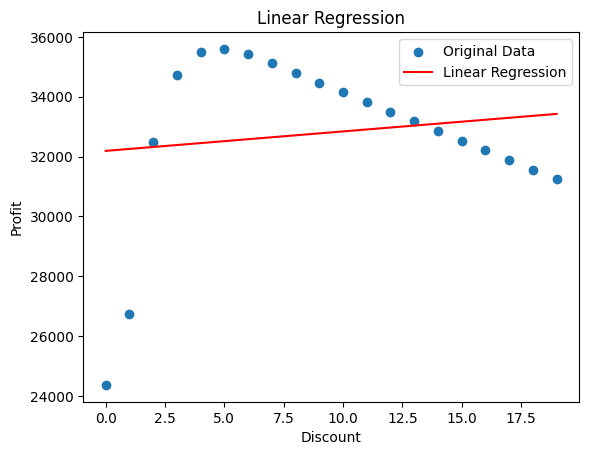

R-squared: 0.018176780719957764


In [63]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Separating the features (X) and target (y)
X = final_results_df4['Discount'].values.reshape(-1, 1)
y = final_results_df4['Profit'].values

# Creating a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Getting predictions from the model
predictions = model.predict(X)

# Printing the model's coefficients
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

# Plotting the original data and the linear regression line
plt.scatter(X, y, label='Original Data')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Linear Regression')
plt.legend()
plt.show()
from sklearn.metrics import r2_score

# Calculating R-squared
r2 = r2_score(y, predictions)
print("R-squared:", r2)


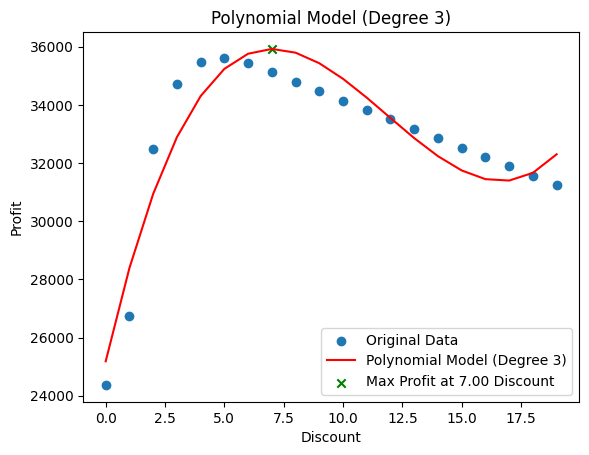

Maximum Profit: 35922.10318349937
Discount at Max Profit: 7


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Separating the features (X) and target (y)
X = final_results_df4['Discount'].values
y = final_results_df4['Profit'].values

# Fitting the polynomial model
degree = 3  # Degree of the polynomial
coefficients = np.polyfit(X, y, degree)
polynomial_predictions = np.polyval(coefficients, X)

# Finding the maximum profit and corresponding discount
max_profit_index = np.argmax(polynomial_predictions)
max_profit = polynomial_predictions[max_profit_index]
max_discount = X[max_profit_index]

# Plotting the original data and the polynomial model curve
plt.scatter(X, y, label='Original Data')
plt.plot(X, polynomial_predictions, color='red', label=f'Polynomial Model (Degree {degree})')
plt.scatter(max_discount, max_profit, color='green', label=f'Max Profit at {max_discount:.2f} Discount', marker='x')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title(f'Polynomial Model (Degree {degree})')
plt.legend()
plt.show()

print("Maximum Profit:", max_profit)
print("Discount at Max Profit:", max_discount)


In [67]:
C_selling["ITEM12n3n4"] = np.where(
    ((C_selling['ITEM1'] >= 1) |
    (C_selling['ITEM2']>=1))&
    (C_selling['ITEM4'] >= 1)&
    (C_selling['ITEM3'] == 1),
    1,  # Value to assign if conditions are met
    0 ) # Value to assign if conditions are not met
    
(C_selling["ITEM12n3n4"]).sum() 

61

In [69]:
Item12n3n4=C_selling[['Inv Sl no',  'unit_cost1', 'unit_cost2',
       'unit_cost3', 'unit_cost4', 'ITEM1',
       'ITEM2', 'ITEM3', 'ITEM4', 'margin1', 'margin2', 'margin3', 'margin4', 'Margin',
       'Billed Amount','ITEM12n3','ITEM12n4',"ITEM12n3n4"]]

In [70]:
# Define the custom functions outside the loop
def calculate_new_delta_profit(row, i):
    if row['ITEM12n4'] == 1:
        return row['Margin'] * row['ITEM4'] + (row['Margin'] - i)
    else:
        return 0

def calculate_new_bill(row, i):
    if row['ITEM12n3n4'] == 1:
        return row['Billed Amount'] + row['unit_cost1'] * ((row['ITEM3']*row["ITEM4"]) - i) * (row['ITEM3']*row['ITEM4'])
    else:
        return row['Billed Amount']

def calculate_new_profit(row, i):
    if row['ITEM12n3n4'] == 0:
        return row['Margin']
    else:
        if row[f'New Bill_{i}'] <= 83:
            return row[f'New Delta Profit_{i}']
        else:
            return row['Margin']
discount={'Discount':[],'Profit':[]}
# Apply the custom functions in the loop
for i in range(0, 20):
    Item12n3n4[f'New Delta Profit_{i}'] = Item12n3n4.apply(lambda row: calculate_new_delta_profit(row, i), axis=1)
    Item12n3n4[f'New Bill_{i}'] =Item12n3n4.apply(lambda row: calculate_new_bill(row, i), axis=1)
    Item12n3n4[f'New Profit with in 83 Rs bill_{i}'] =Item12n3n4.apply(lambda row: calculate_new_profit(row, i), axis=1)
    total_profit=Item12n3n4[f'New Profit with in 83 Rs bill_{i}'].sum()
    discount['Discount'].append(i)
    discount['Profit'].append(total_profit)
final_results_df5 = pd.DataFrame(discount)

# Display the final results DataFrame
print(final_results_df5)



    Discount   Profit
0          0  17814.0
1          1  17814.0
2          2  17544.5
3          3  16975.0
4          4  16840.0
5          5  16808.0
6          6  16808.0
7          7  16808.0
8          8  16808.0
9          9  16808.0
10        10  16808.0
11        11  16808.0
12        12  16808.0
13        13  16808.0
14        14  16808.0
15        15  16808.0
16        16  16808.0
17        17  16808.0
18        18  16808.0
19        19  16808.0


In [71]:
import pandas as pd
import numpy as np

# Assuming c_selling is your DataFrame
result_dataframes = {}  # Dictionary to store result DataFrames

for i in range(0, 20):
    new_column_name = [f"Loss In Profit Combo_{i}"]  # Create a new column name for each i
    
    new_column_name = np.where(
        C_selling["ITEM12n3n4"] == 1,
        np.minimum(C_selling["ITEM4"],C_selling["ITEM3"], C_selling["ITEM1"] + C_selling["ITEM2"]) * i,
        0
    )
    
    # Calculate and store the sum for the current column in the result dictionary
    column_sum = new_column_name.sum()
    result_dataframes[i] = pd.DataFrame({f"Loss for Discount_{i}": [column_sum]})

# Convert the dictionary of DataFrames into a single DataFrame
result_df = pd.concat(result_dataframes.values(), axis=1)

# Reset the index to have a proper DataFrame structure
result_df = result_df.reset_index(drop=True)

# Use pd.melt() to transform the DataFrame
ITEM12n3n4_loss = pd.melt(result_df, value_vars=result_df.columns, var_name="Loss in Combo Item12n4 not 3", value_name="Value")

# Print the melted DataFrame
print(ITEM12n3n4_loss)


   Loss in Combo Item12n4 not 3  Value
0           Loss for Discount_0      0
1           Loss for Discount_1     61
2           Loss for Discount_2    122
3           Loss for Discount_3    183
4           Loss for Discount_4    244
5           Loss for Discount_5    305
6           Loss for Discount_6    366
7           Loss for Discount_7    427
8           Loss for Discount_8    488
9           Loss for Discount_9    549
10         Loss for Discount_10    610
11         Loss for Discount_11    671
12         Loss for Discount_12    732
13         Loss for Discount_13    793
14         Loss for Discount_14    854
15         Loss for Discount_15    915
16         Loss for Discount_16    976
17         Loss for Discount_17   1037
18         Loss for Discount_18   1098
19         Loss for Discount_19   1159


In [72]:
final_results_df5['NET_Profit']=final_results_df5['Profit']-ITEM12n3n4_loss['Value']

In [73]:
final_results_df5

,Discount,Profit,NET_Profit
0,0,17814.0,17814.0
1,1,17814.0,17753.0
2,2,17544.5,17422.5
3,3,16975.0,16792.0
4,4,16840.0,16596.0
5,5,16808.0,16503.0
6,6,16808.0,16442.0
7,7,16808.0,16381.0
8,8,16808.0,16320.0
9,9,16808.0,16259.0


In [ ]:
with pd.ExcelWriter("C:\\Users\\kiran\\Downloads\\Project\\DISCOUNT.xlsx", engine='xlsxwriter') as writer:
    final_results_df3.to_excel(writer, sheet_name='ITEM12n3_4', index=False)
    final_results_df4.to_excel(writer, sheet_name='ITEM12n4_3', index=False)
    